In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from algorithms import *
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [16, 9]

/var/folders/0r/fnhmtj6x0b39mk4t7hkr6pph0000gn/T/ipykernel_36529/4284585080.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


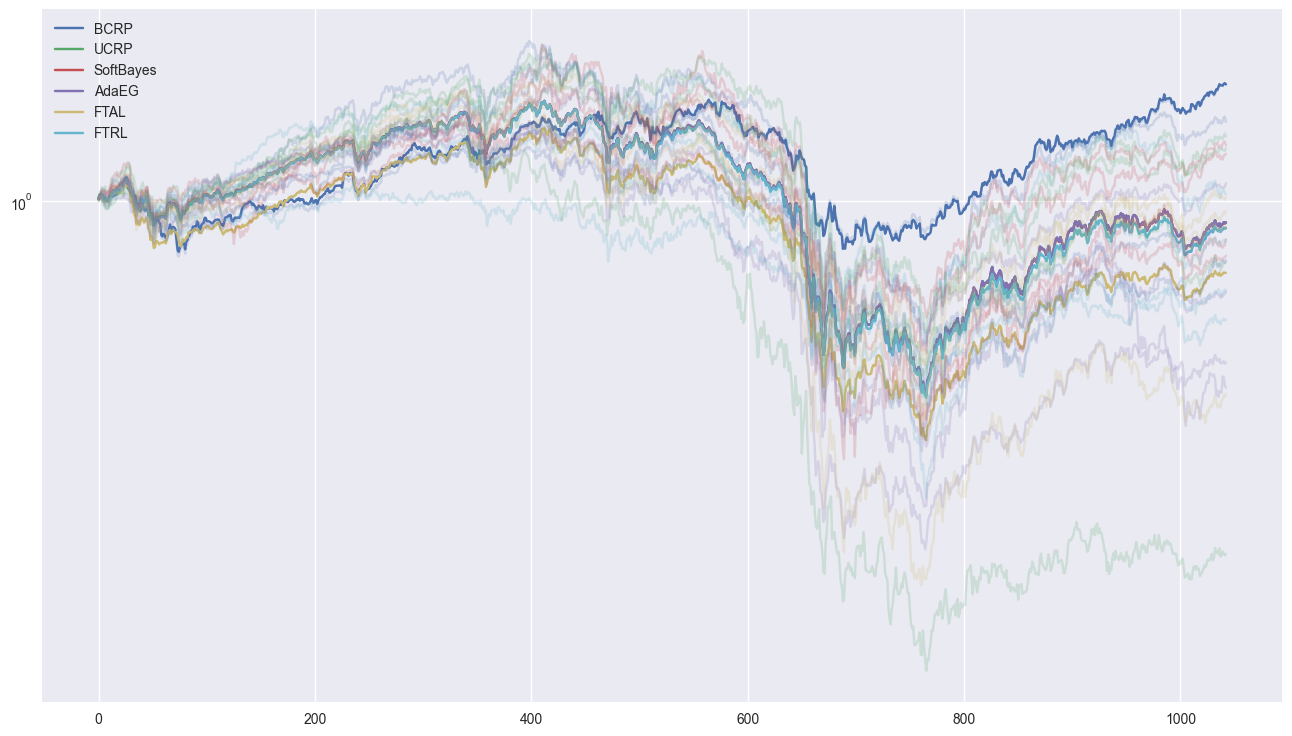

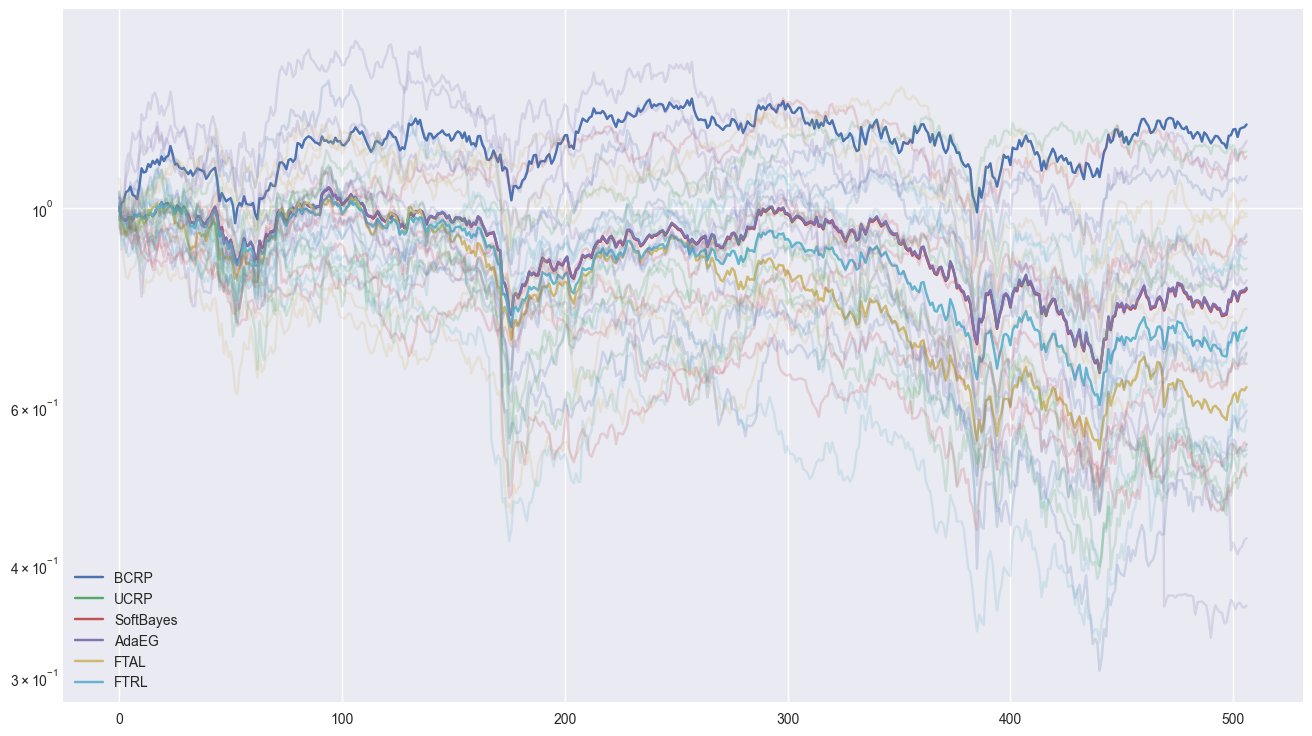

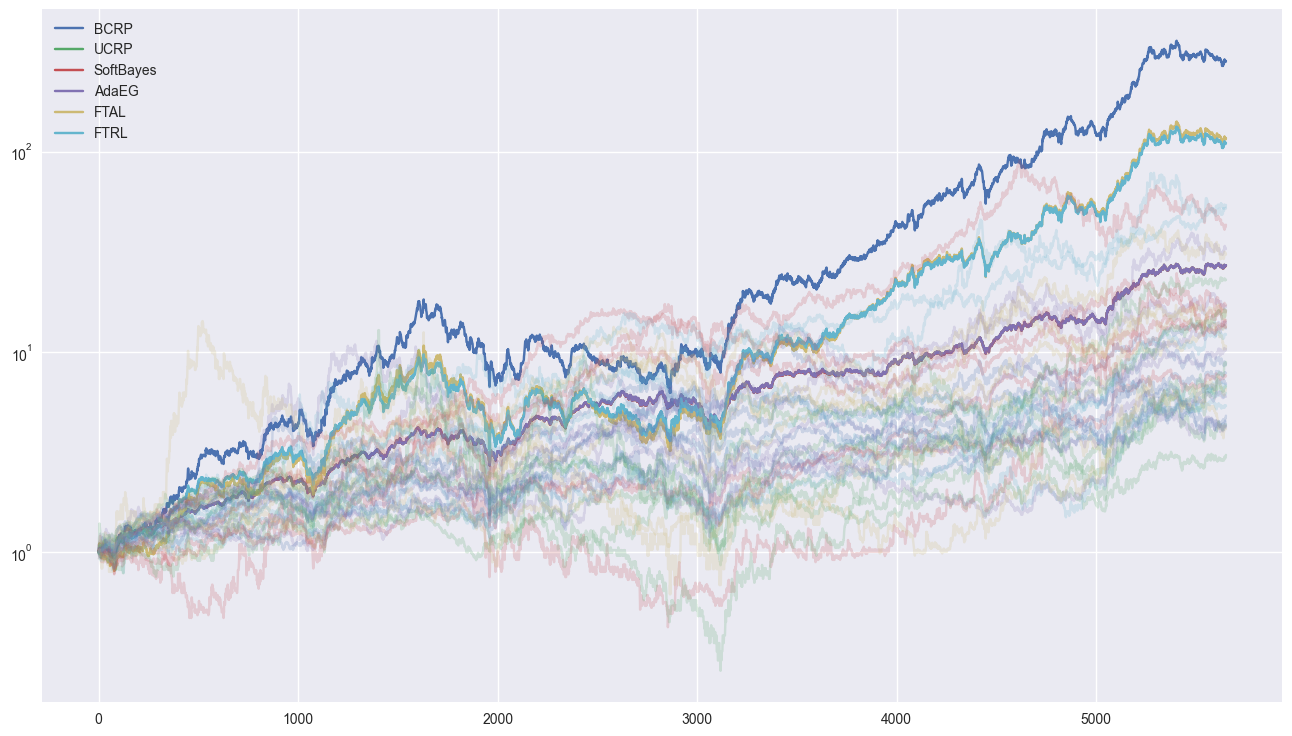

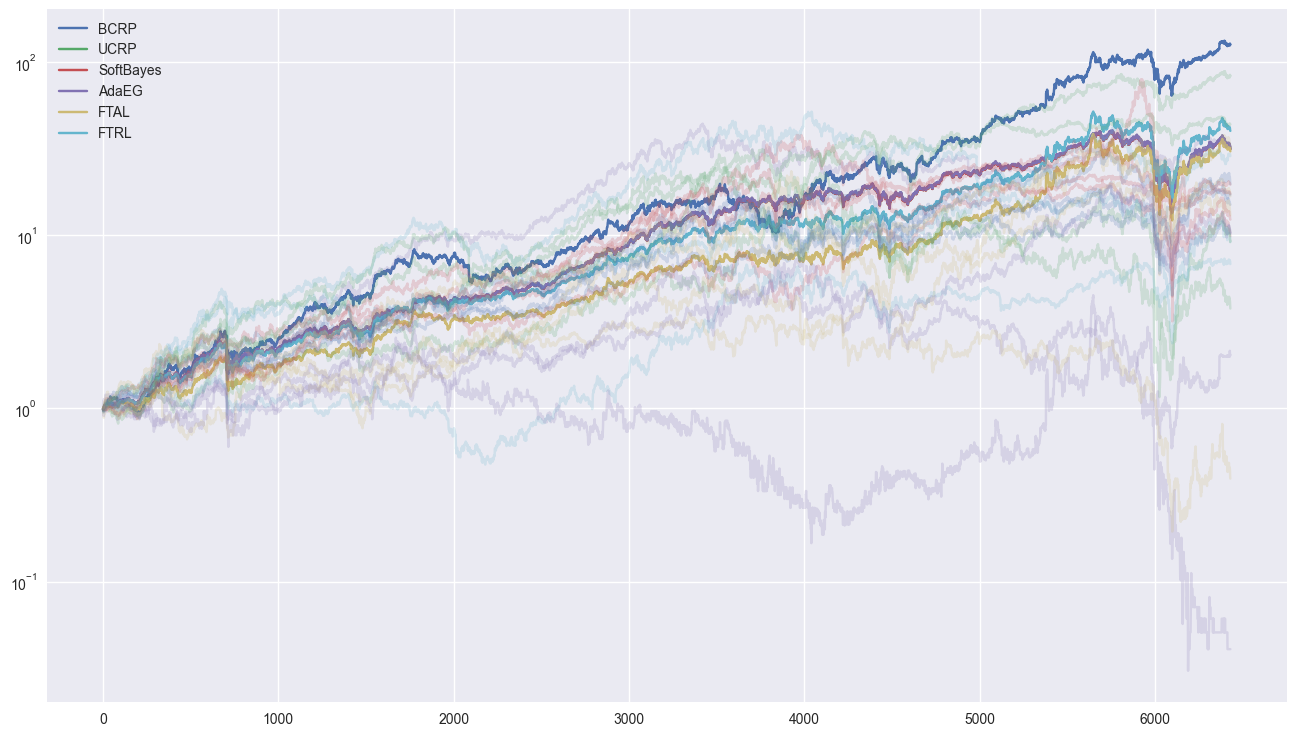

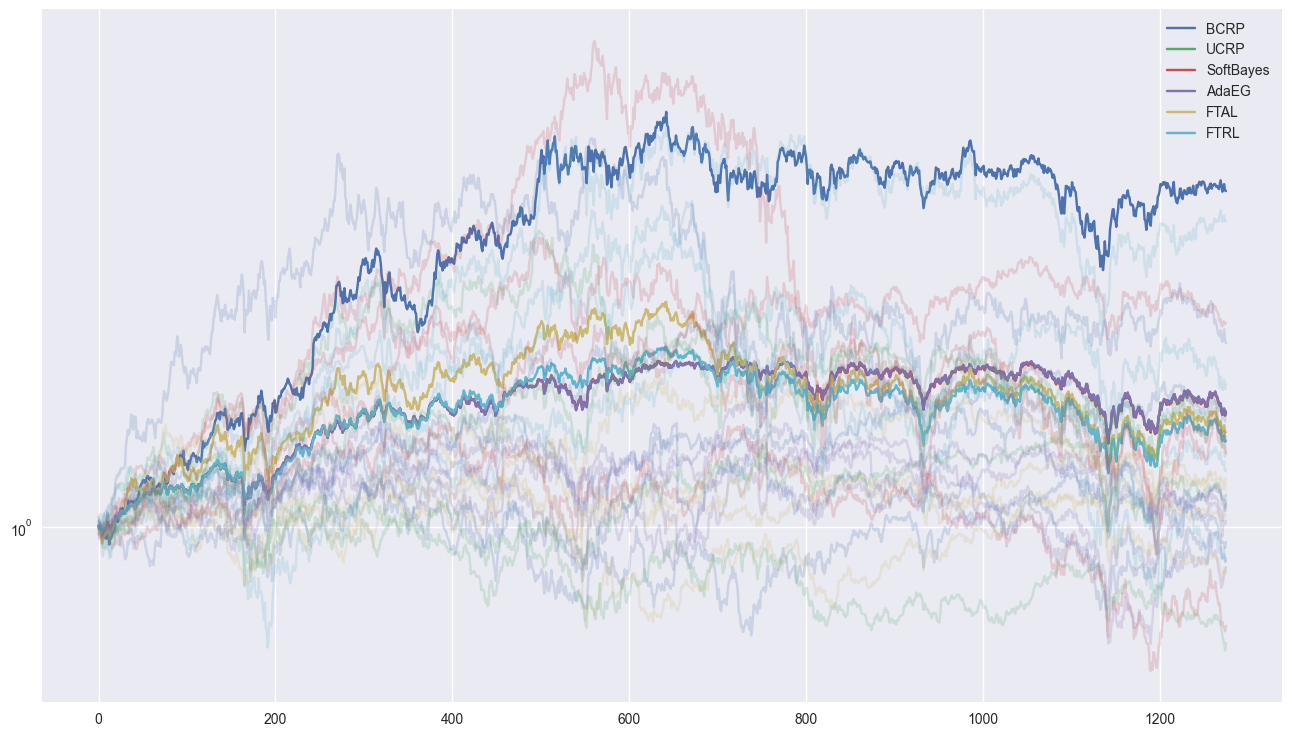

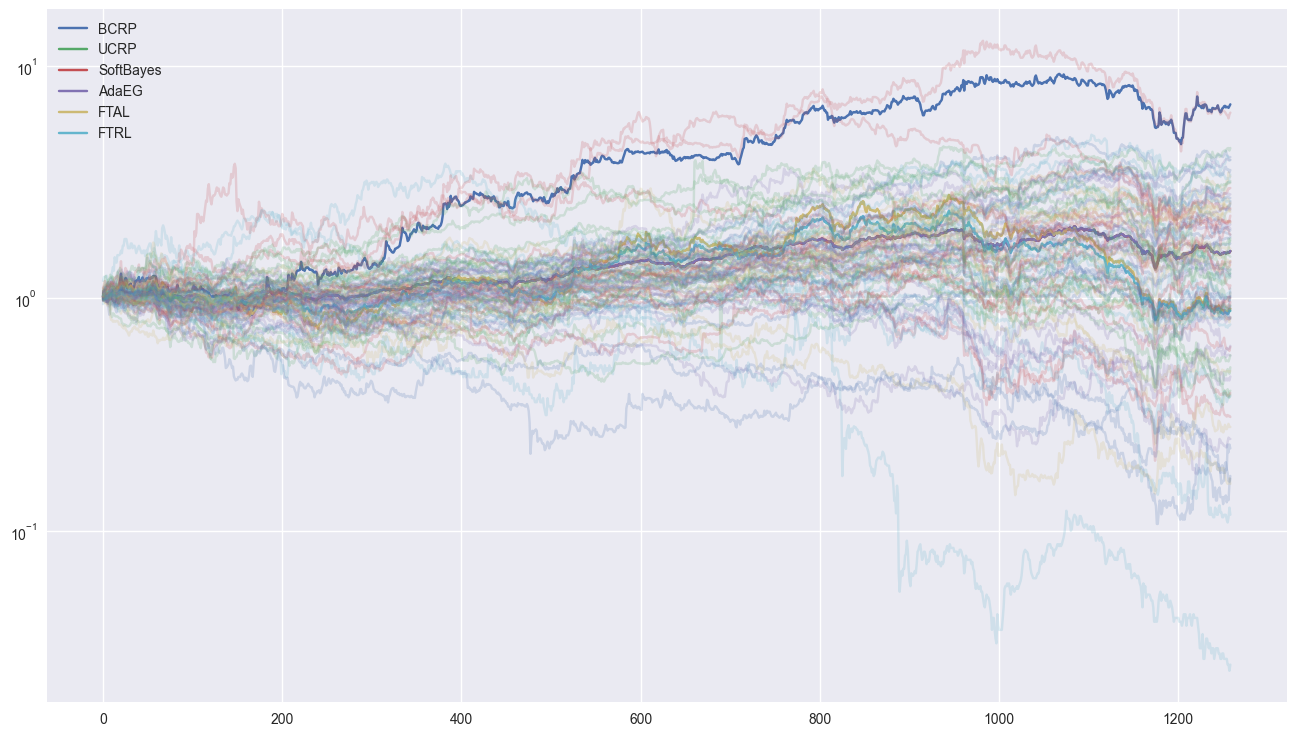

In [2]:
# Automate this for all datasets

import os
import glob

# Get a list of all the file paths that ends with .csv from in specified directory
path = "datasets/"
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Loop over the list of csv files
performances = dict()
for f in csv_files:
    df = pd.read_csv(f, index_col=0)
    df_cum = df.cumprod()

    weight_BCRP = BCRP(df)
    weight_UCRP = UCRP(df)
    weight_SoftBayes = SoftBayes(df)
    weight_AdaEG = AdaEG(df)
    weight_FTAL = FTAL(df)
    weight_FTRL = FTRL(df)

    df_BCRP = df.mul(weight_BCRP, axis=1).sum(axis=1).cumprod()
    df_UCRP = df.mul(weight_UCRP, axis=1).sum(axis=1).cumprod()
    df_SoftBayes = df.mul(weight_SoftBayes, axis=1).sum(axis=1).cumprod()
    df_AdaEG = df.mul(weight_AdaEG, axis=1).sum(axis=1).cumprod()
    df_FTAL = df.mul(weight_FTAL, axis=1).sum(axis=1).cumprod()
    df_FTRL = df.mul(weight_FTRL, axis=1).sum(axis=1).cumprod()
    
    performance = pd.DataFrame({'BCRP': df_BCRP, 'UCRP': df_UCRP, 'SoftBayes': df_SoftBayes,  'AdaEG': df_AdaEG, 'FTAL': df_FTAL, 'FTRL': df_FTRL})
    #save the performance dataframe
    performances[f[9:-4]] = performance
    ax = performance.plot()
    df_cum.plot(ax=ax, legend=False, alpha=0.2, logy=True)
    plt.show()
    plt.close()

In [3]:
for key, value in performances.items():
    print(key)
    display(value.tail(1))

msci


BCRP      UCRP SoftBayes    AdaEG     FTAL      FTRL
1042  1.505525  0.926836  0.926564  0.92754  0.77702  0.908417

djia


BCRP      UCRP SoftBayes     AdaEG      FTAL      FTRL
506  1.239825  0.812726  0.811729  0.815449  0.632082  0.735799

nyse-o


BCRP       UCRP  SoftBayes      AdaEG        FTAL        FTRL
5650  282.407002  27.075246  27.061927  27.110306  116.549524  110.307681

nyse-n


BCRP       UCRP  SoftBayes      AdaEG       FTAL       FTRL
6430  126.632982  31.551706  31.489244  31.711363  30.623937  40.214315

sp500


BCRP      UCRP SoftBayes     AdaEG      FTAL     FTRL
1275  4.307386  1.648714  1.646224  1.655227  1.511053  1.45872

tse


BCRP      UCRP SoftBayes     AdaEG      FTAL      FTRL
1258  6.816451  1.595225  1.594725  1.596756  0.901531  0.882498

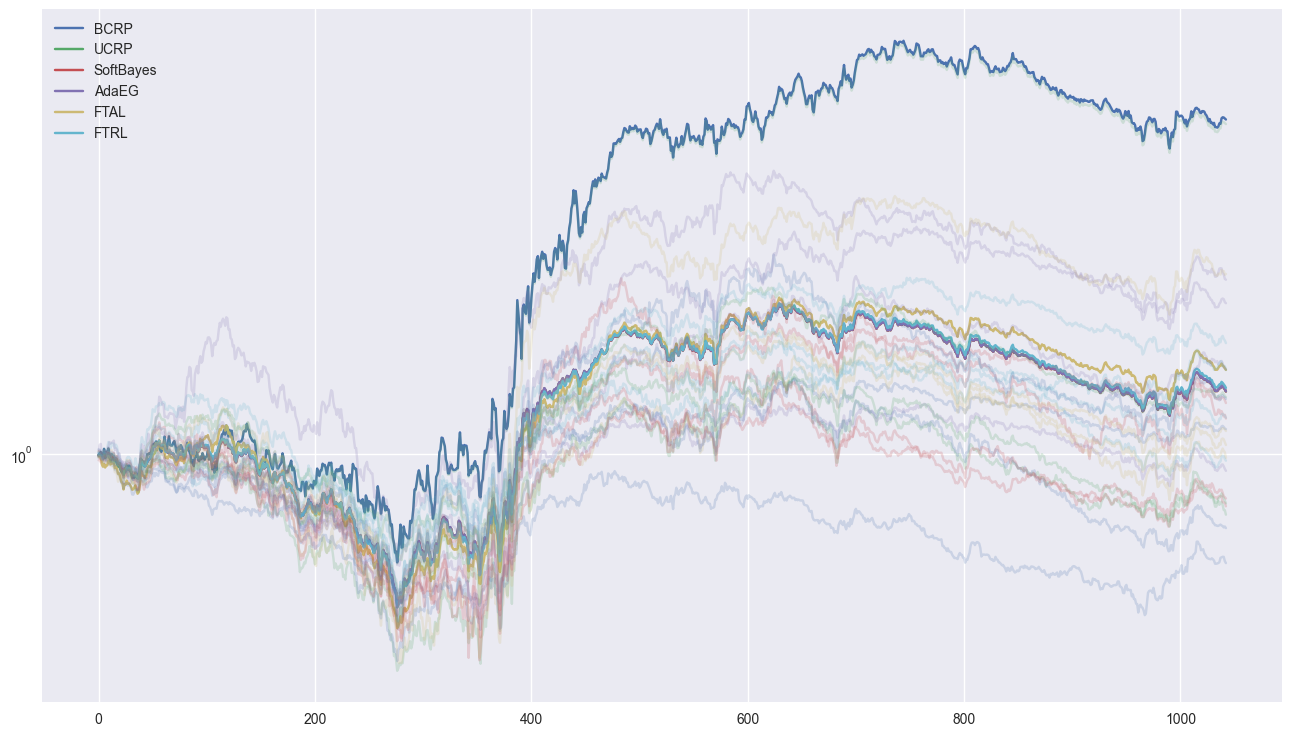

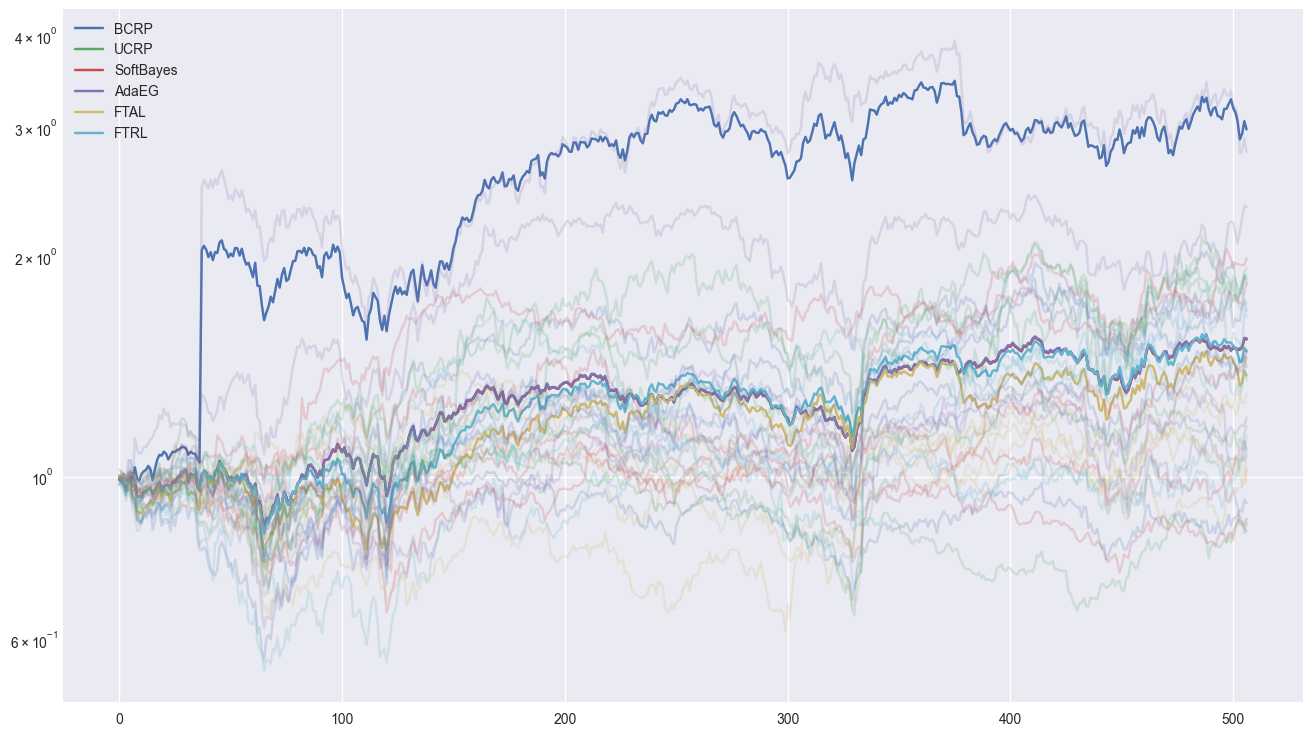

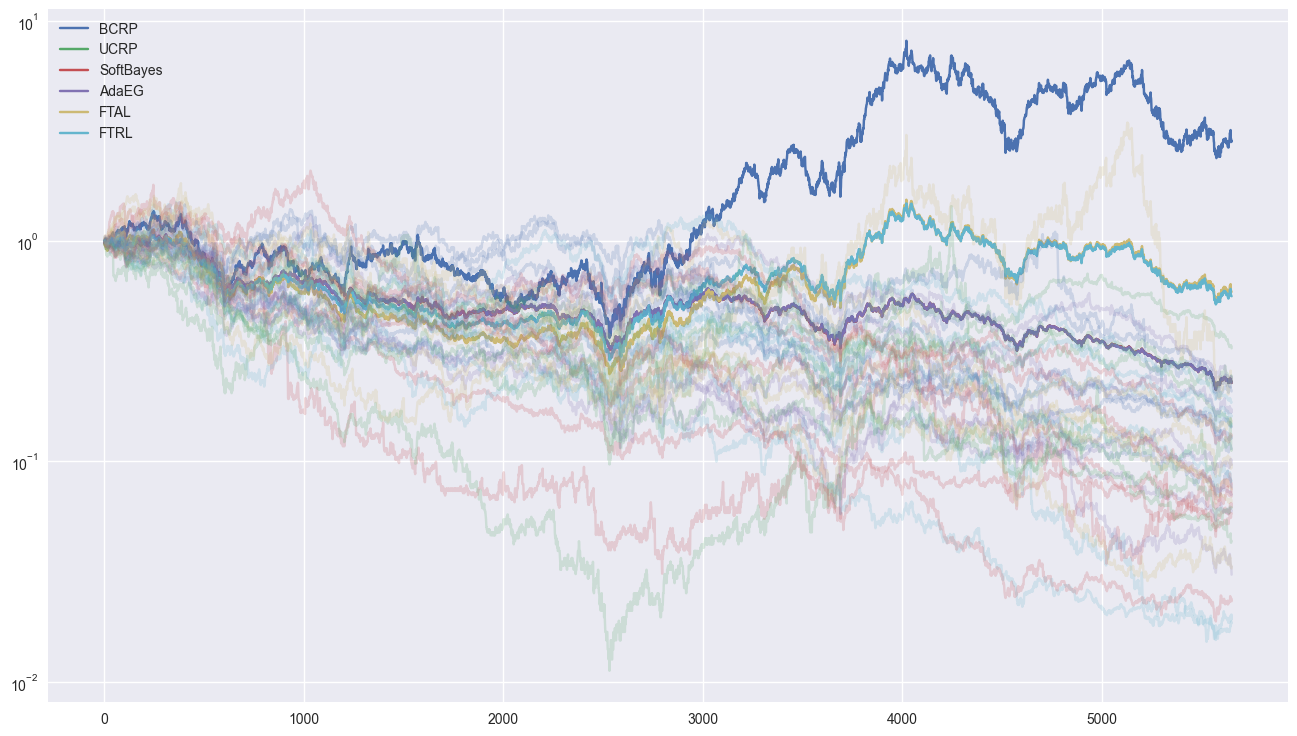

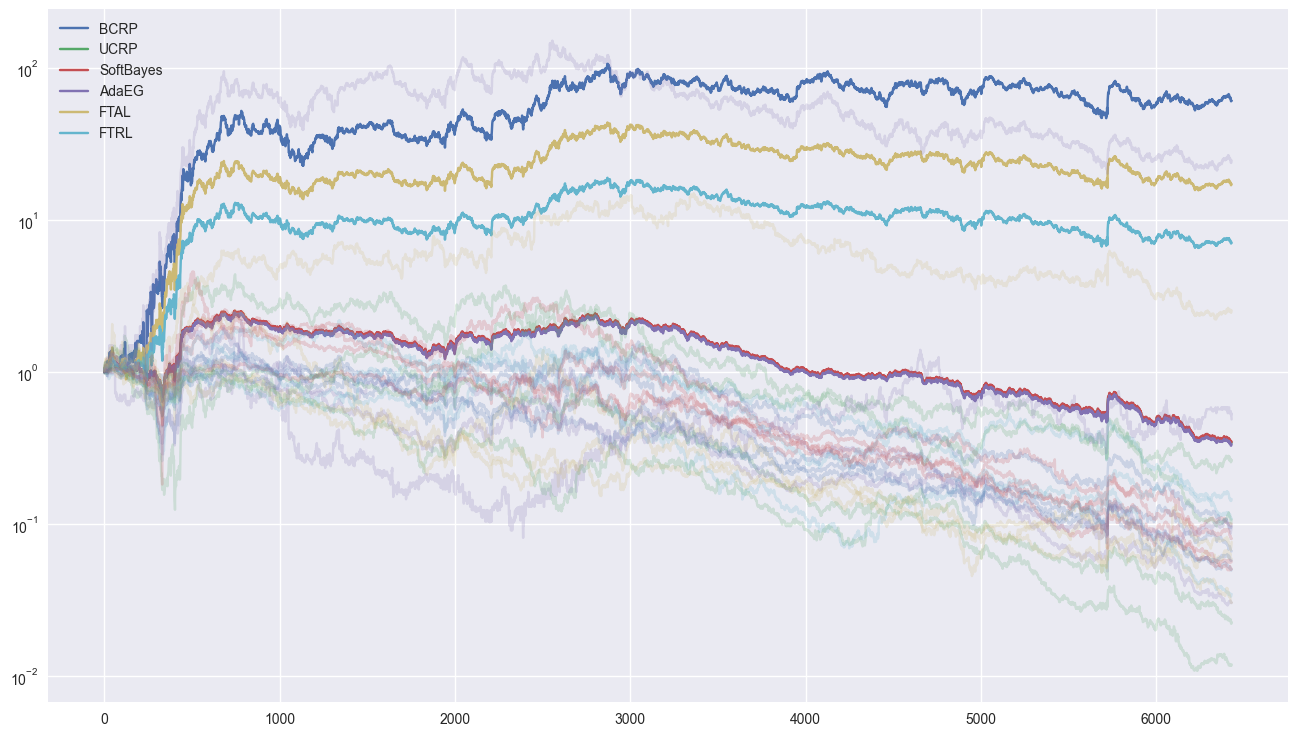

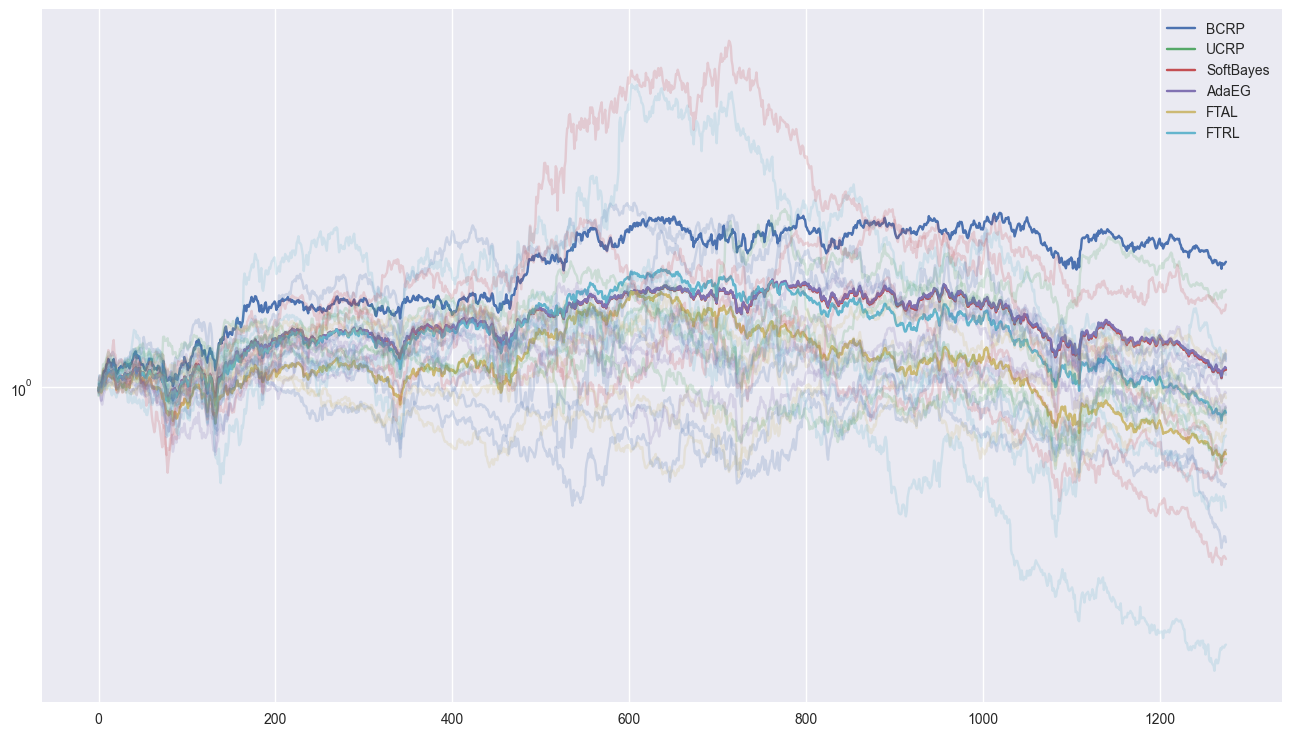

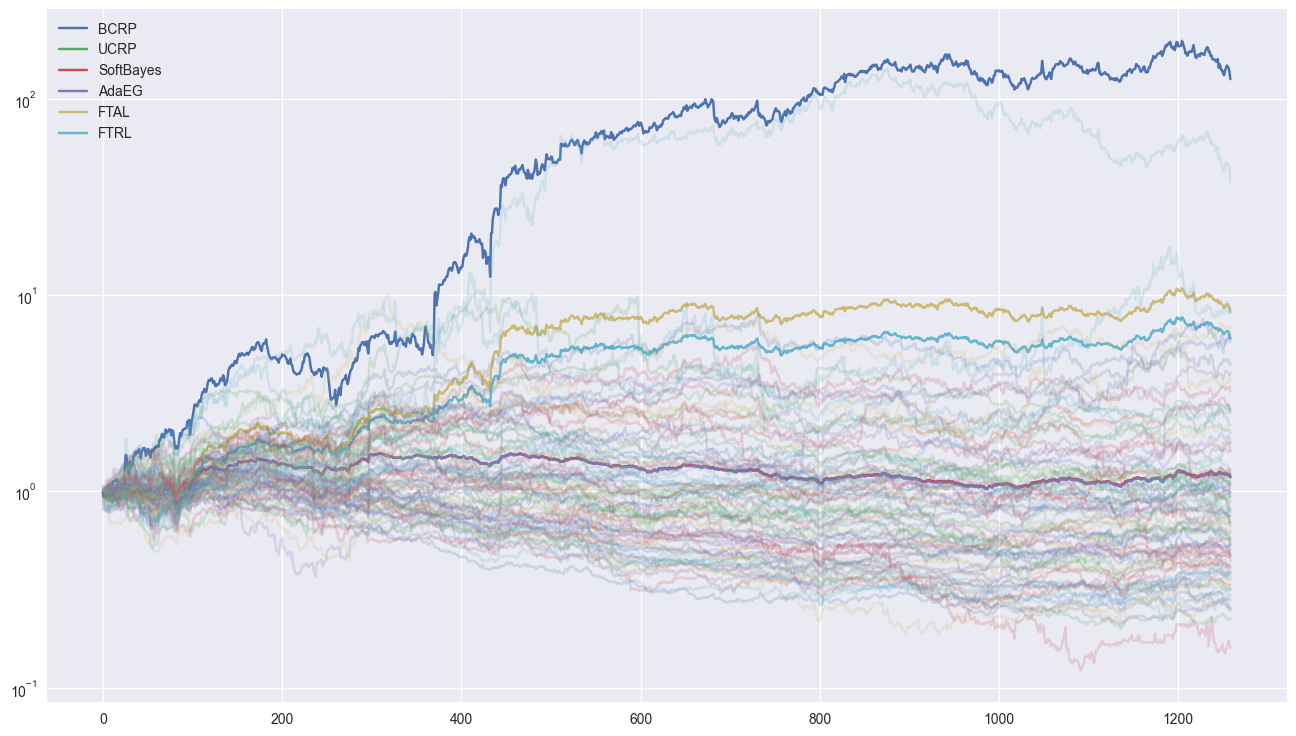

In [6]:
# Automate this for all datasets

import os
import glob

# Get a list of all the file paths that ends with .csv from in specified directory
path = "datasets/"
csv_files = glob.glob(os.path.join(path, "*.csv"))
# Run on inverse datasets
# Reverse the order of the list and invert the price returns

# Loop over the list of csv files
performances = dict()
for f in csv_files:
    df = pd.read_csv(f, index_col=0)
    df = df.iloc[::-1]
    df.index = df.index[::-1]
    df = df.apply(lambda x: 1/x)

    df_cum = df.cumprod()

    weight_BCRP = BCRP(df)
    weight_UCRP = UCRP(df)
    weight_SoftBayes = SoftBayes(df)
    weight_AdaEG = AdaEG(df)
    weight_FTAL = FTAL(df)
    weight_FTRL = FTRL(df)

    df_BCRP = df.mul(weight_BCRP, axis=1).sum(axis=1).cumprod()
    df_UCRP = df.mul(weight_UCRP, axis=1).sum(axis=1).cumprod()
    df_SoftBayes = df.mul(weight_SoftBayes, axis=1).sum(axis=1).cumprod()
    df_AdaEG = df.mul(weight_AdaEG, axis=1).sum(axis=1).cumprod()
    df_FTAL = df.mul(weight_FTAL, axis=1).sum(axis=1).cumprod()
    df_FTRL = df.mul(weight_FTRL, axis=1).sum(axis=1).cumprod()
    
    performance = pd.DataFrame({'BCRP': df_BCRP, 'UCRP': df_UCRP, 'SoftBayes': df_SoftBayes,  'AdaEG': df_AdaEG, 'FTAL': df_FTAL, 'FTRL': df_FTRL})
    #save the performance dataframe
    performances[f[9:-4]] = performance
    ax = performance.plot()
    df_cum.plot(ax=ax, legend=False, alpha=0.2, logy=True)
    plt.show()
    plt.close()

In [7]:
for key, value in performances.items():
    print(key)
    display(value.tail(1))

msci


BCRP      UCRP SoftBayes     AdaEG      FTAL      FTRL
1042  3.51477  1.266523  1.266198  1.267385  1.373088  1.283418

djia


BCRP      UCRP SoftBayes     AdaEG      FTAL      FTRL
506  2.97674  1.539965  1.538459  1.543936  1.373723  1.480564

nyse-o


BCRP      UCRP SoftBayes     AdaEG      FTAL      FTRL
5650  2.861676  0.227417  0.227408  0.227454  0.588968  0.562463

nyse-n


BCRP      UCRP SoftBayes     AdaEG      FTAL      FTRL
6430  60.867618  0.345059  0.349489  0.334644  17.21052  7.115548

sp500


BCRP      UCRP SoftBayes     AdaEG      FTAL      FTRL
1275  1.911757  1.097291  1.094569  1.104384  0.707496  0.876984

tse


BCRP      UCRP SoftBayes     AdaEG     FTAL      FTRL
1258  125.706645  1.189188   1.19252  1.179488  8.17587  6.017085